In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from activephasemap.utils.simulators import UVVisExperiment


## Inspect iterations data

In [2]:
design_space_bounds = [(0.0, 87.0), (0.0,11.0)]
expt = UVVisExperiment(design_space_bounds, "../data/")
expt.read_iter_data(7)
expt.generate(use_spline=True)

Loading data from iteration 0 with shapes: (24, 2) (24, 101)
Loading data from iteration 1 with shapes: (11, 2) (11, 101)
Loading data from iteration 2 with shapes: (11, 2) (11, 101)
Loading data from iteration 3 with shapes: (11, 2) (11, 101)
Loading data from iteration 4 with shapes: (11, 2) (11, 101)
Loading data from iteration 5 with shapes: (11, 2) (11, 101)
Loading data from iteration 6 with shapes: (11, 2) (11, 101)


In [3]:
uvvis_data_redisperse = pd.read_excel("../uvvis/redisperse.xlsx", engine='openpyxl')
water = uvvis_data_redisperse.iloc[:,-1].to_numpy()
wavelength = uvvis_data_redisperse["Wavelength"].to_numpy()
well_names = uvvis_data_redisperse.columns[1:].to_numpy()

spectra_redisperse = []
for well_name in well_names:
    if well_name not in ["C12", "D12", "E12", "F12", "G12", "H12"]:
        y = uvvis_data_redisperse[well_name].values-water
        spectra_redisperse.append(y)
spectra_redisperse = np.asarray(spectra_redisperse)
print(spectra_redisperse.shape)

(90, 101)


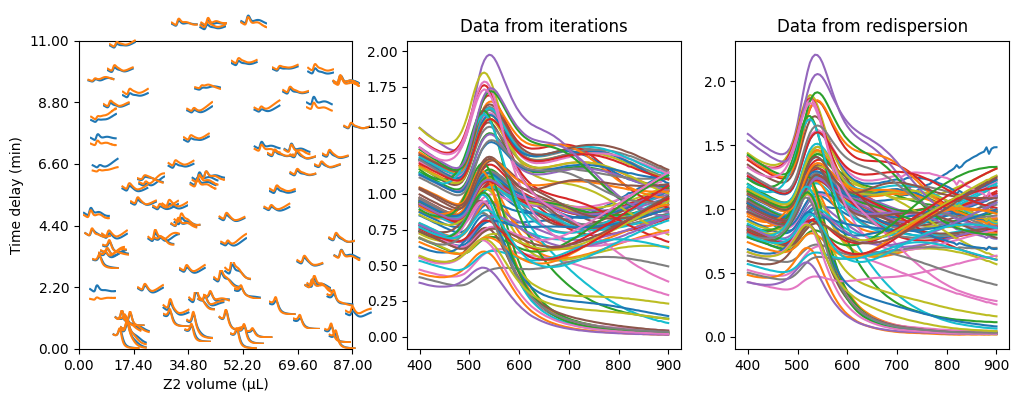

In [4]:
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap

spectra_iters = expt.spectra
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T
fig, axs = plt.subplots(1,3, figsize=(3*4,4))
plot_phasemap(bounds, axs[0], expt.comps, spectra_iters, limits=[0,1.9])
plot_phasemap(bounds, axs[0], expt.comps, spectra_redisperse, limits=[0,1.9], color="tab:orange")
axs[0].set_xlabel('Z2 volume (µL)')
axs[0].set_ylabel('Time delay (min)') 

for i in range(expt.comps.shape[0]):
    axs[1].plot(wavelength, spectra_iters[i,:])
    axs[2].plot(wavelength, spectra_redisperse[i,:])
axs[1].set_title("Data from iterations")
axs[2].set_title("Data from redispersion")
plt.show()

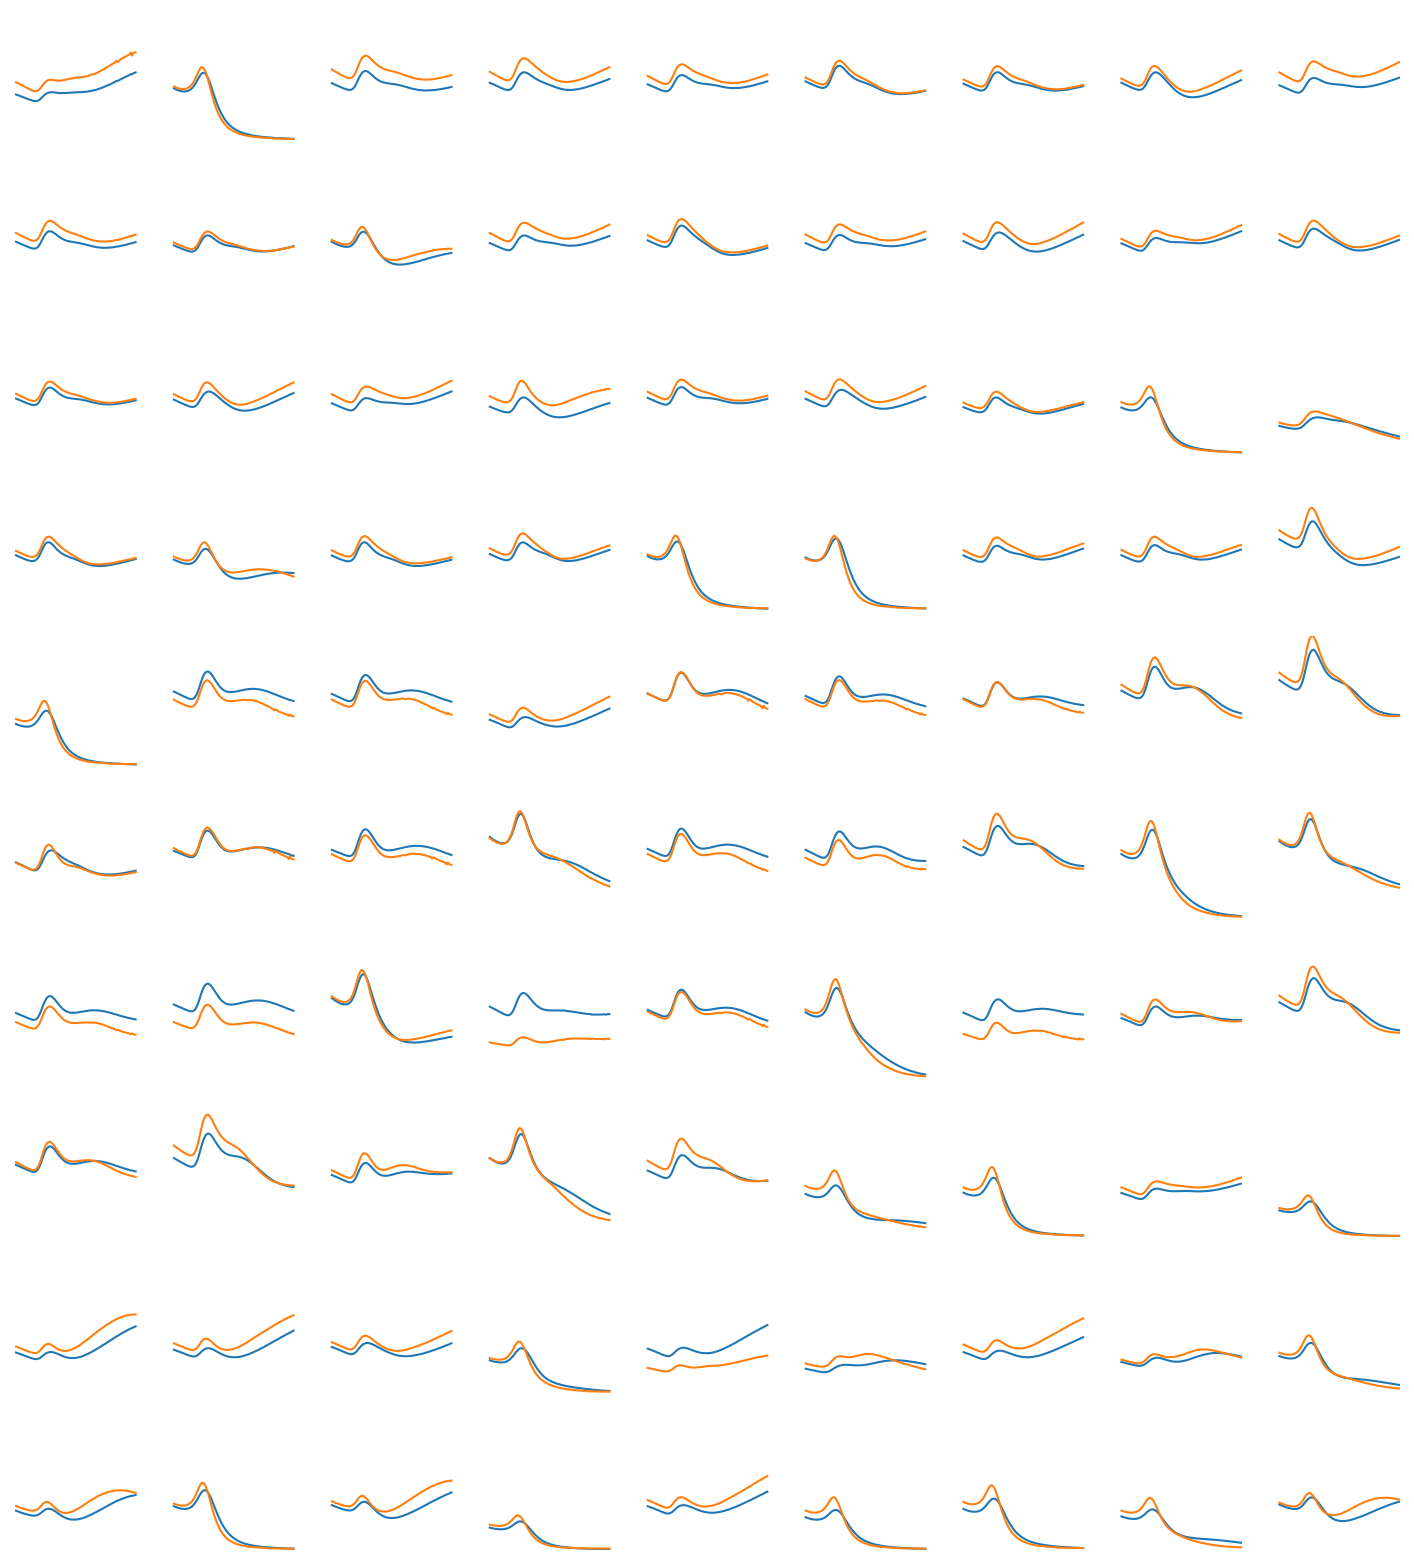

In [5]:
fig, axs = plt.subplots(10,9, figsize=(2*9,2*10))
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.plot(wavelength, spectra_iters[i,:])
    ax.plot(wavelength, spectra_redisperse[i,:])
    ax.set_ylim([0.0, 2.2])
    ax.axis("off")
plt.show()

## Inspect validation data

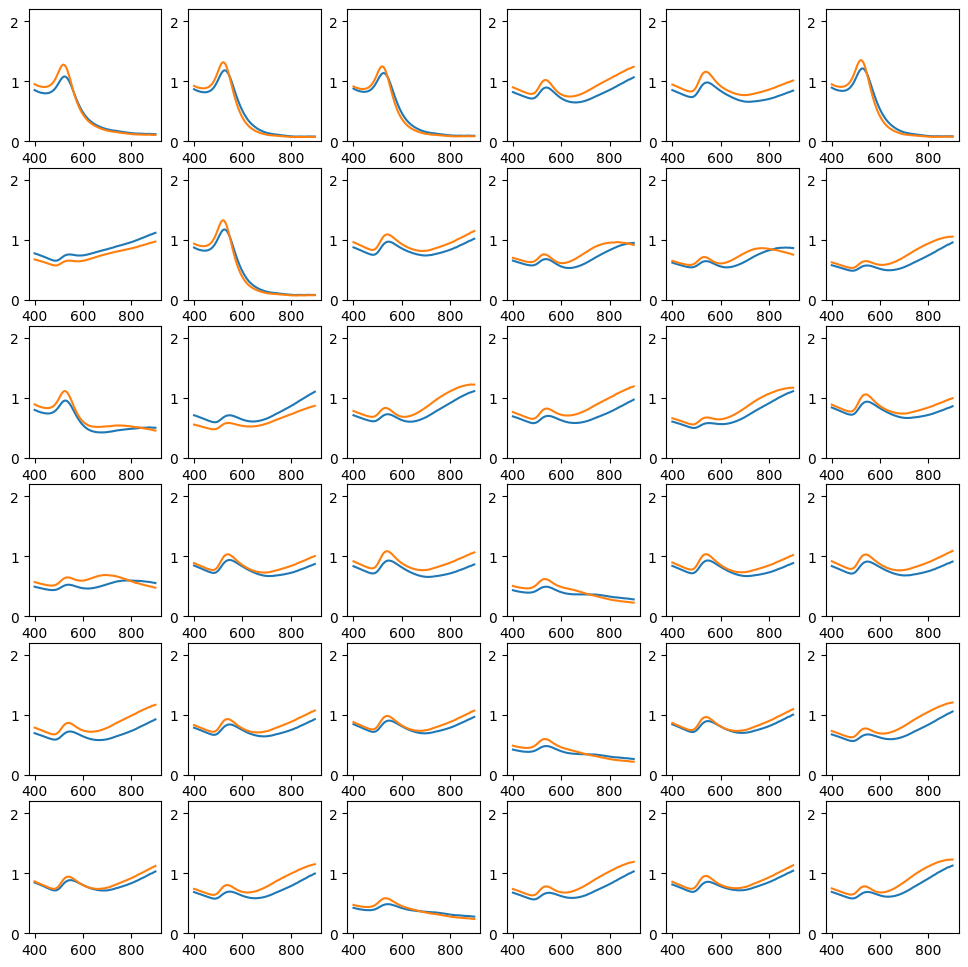

In [6]:
validations_redisperse = pd.read_excel("../uvvis/validations_redisperse.xlsx", engine='openpyxl')
wavelength = validations_redisperse["Wavelength"].to_numpy()
well_names = validations_redisperse.columns[1:].to_numpy()

validations = pd.read_excel("../uvvis/validations.xlsx", engine='openpyxl')

fig, axs = plt.subplots(6,6, figsize=(2*6,2*6))
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.plot(wavelength, validations[well_names[i]].values)
    ax.plot(wavelength, validations_redisperse[well_names[i]].values)
    ax.set_ylim([0.0, 2.2])
    # ax.axis("off")
plt.show()


### Comapre iter spectra with validation spectra

In [7]:
retrosynth_volume_df = pd.read_csv('../retrosynth/volumes_SDL.csv')
retrosynth_time_df = pd.read_csv('../retrosynth/times_SDL.csv')
linesamples_volume_df = pd.read_csv('../line_sample_validation/volumes_line_samples.csv')
linesamples_time_df = pd.read_csv('../line_sample_validation/times_line_samples.csv')
volumes_validations = np.vstack((retrosynth_volume_df.to_numpy(), linesamples_volume_df.to_numpy()))
times_validations = np.vstack((retrosynth_time_df.to_numpy(), linesamples_time_df.to_numpy()))

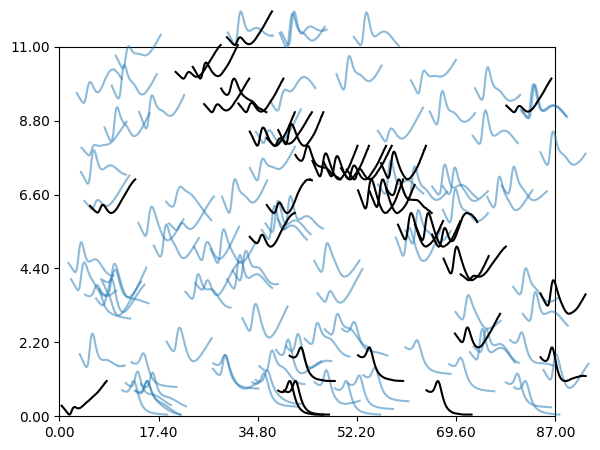

In [20]:
fig, ax = plt.subplots()
comps_validation = np.vstack((volumes_validations[:,-1], times_validations[:,-1])).T
spectra_val = validations.iloc[:,1:-1].to_numpy().T
spectra_val = validations.iloc[:,1:-1].to_numpy().T
plot_phasemap(bounds, ax, expt.comps, spectra_iters, alpha=0.5)
plot_phasemap(bounds, ax, comps_validation, spectra_val, color="k")
plt.show()